In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_parquet('./data/')
df.loc[df['wave_direction'] == 'min', 'wave_direction'] = 1
df.loc[df['wave_direction'] == 'max', 'wave_direction'] = -1
df = df.astype({"wave_direction": 'float64'})

# df = df[abs(df['last_price_delta_since_stabilized']) > 1]
# df = df[abs(df['last_price_delta_since_stabilized']) < 8]

# df = df[abs(df['last_price_delta_since_stabilized']) < 10]
# df = df[abs(df['last_price_delta_since_stabilized']) > 0.2]
# df = df[df['stabilized_spread'] < 10] # nem tul nagy spread
# df = df[df['stabilized_amount_mean'] < 0.4]  # nem tul nagy tradek
# df = df[df['stabilized_nr_trades'] < 300]  # nem tul sok trade

# for col in df.columns:
#     if 'nr_trades' in col or 'price_delta' in col and not col.startswith('last'):
#         df.drop(col, axis=1, inplace=True)
# df.drop('wave_direction', axis=1, inplace=True)

# df = df[df['0_price_delta'] < 4]

df.reset_index(drop=True, inplace=True)
df

,0_amount_mean,0_nr_trades,0_price_delta,0_spread,1_amount_mean,1_nr_trades,1_price_delta,1_spread,2_amount_mean,2_nr_trades,...,past_final_price_90,past_final_price_91,past_final_price_92,past_final_price_93,past_final_price_94,past_final_price_95,past_final_price_96,past_final_price_97,past_final_price_98,past_final_price_99
0,0.0426,54.0,0.25,2.95,0.0436,55.0,0.25,2.95,0.0429,56.0,...,9.31,13.67,10.20,5.43,11.71,3.09,2.47,1.29,6.52,0.0
1,0.0091,4.0,0.40,1.34,0.0081,5.0,0.40,1.34,0.0151,6.0,...,9.31,13.67,10.20,5.43,11.71,3.09,2.47,1.29,6.52,0.0
2,0.0248,44.0,0.26,2.27,0.0243,45.0,0.26,2.27,0.0258,46.0,...,20.15,16.68,11.91,18.19,9.57,8.95,7.77,13.00,6.48,0.0
3,0.0303,4.0,0.04,3.08,0.0350,5.0,0.04,3.08,0.0307,8.0,...,12.74,7.97,14.25,5.63,5.01,3.83,9.06,2.54,-3.94,0.0
4,0.0072,5.0,0.00,1.09,0.0060,6.0,0.00,1.11,0.0079,9.0,...,12.74,7.97,14.25,5.63,5.01,3.83,9.06,2.54,-3.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0313,9.0,0.50,0.88,0.0323,16.0,0.40,1.12,0.0373,17.0,...,0.82,-0.08,0.74,0.78,0.39,0.76,-0.82,-0.67,-0.46,0.0
5996,0.0009,5.0,0.56,0.90,0.0029,6.0,0.56,0.90,0.0029,7.0,...,-2.36,-1.54,-1.50,-1.89,-1.52,-3.10,-2.95,-2.74,-2.28,0.0
5997,0.0250,6.0,0.13,0.40,0.0215,7.0,0.13,0.40,0.0190,8.0,...,-2.36,-1.54,-1.50,-1.89,-1.52,-3.10,-2.95,-2.74,-2.28,0.0
5998,0.0189,21.0,0.45,0.71,0.0201,22.0,0.45,0.71,0.0203,23.0,...,-0.71,-0.67,-1.06,-0.69,-2.27,-2.12,-1.91,-1.45,0.83,0.0


In [2]:
# sns.scatterplot(x=df['4_nr_trades'], y=abs(df.last_price_delta_since_stabilized))

a = df.corr().last_price_delta_since_stabilized * 1000
a.sort_values(axis=0, ascending=False)

last_price_delta_since_stabilized    1000.000000
past_final_price_98                   590.377647
wave_direction                        560.428006
past_final_price_97                   472.736360
past_final_price_96                   416.692917
                                        ...     
4_nr_trades                           -22.957923
stabilized_amount_mean                -23.153796
4_amount_mean                         -27.843265
3_amount_mean                         -28.801524
past_final_price_99                          NaN
Name: last_price_delta_since_stabilized, Length: 126, dtype: float64

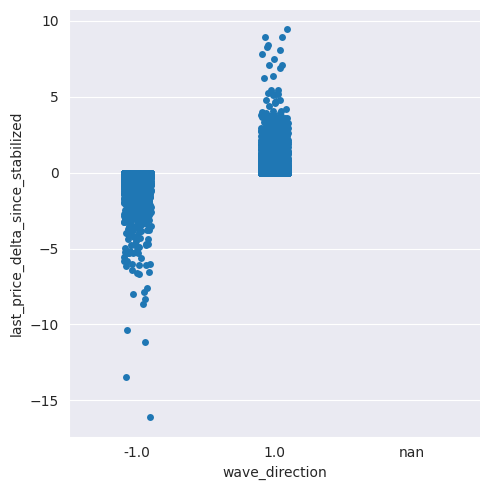

In [6]:
# df.wave_direction.mean()
sns.catplot(x=df.wave_direction, y=df.last_price_delta_since_stabilized)


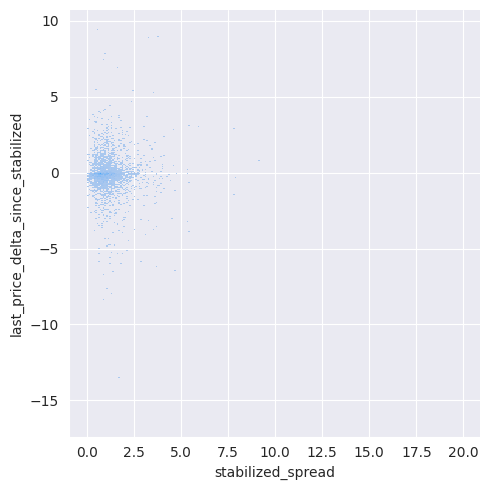

In [4]:
sns.displot(y=df.last_price_delta_since_stabilized, x=df.stabilized_spread)


<AxesSubplot: xlabel='past_final_price_6', ylabel='last_price_delta_since_stabilized'>

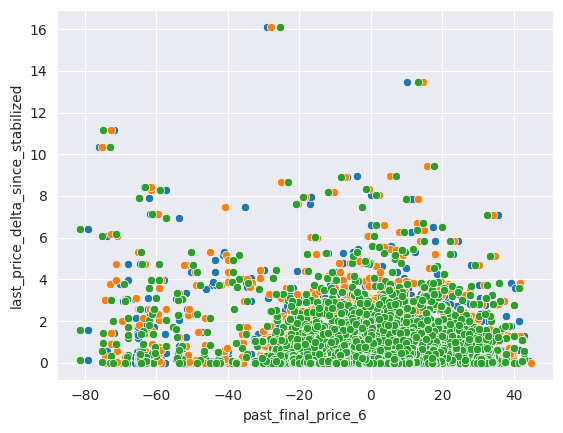

In [3]:
sns.scatterplot(x=df['past_final_price_6'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_7'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_8'], y=abs(df.last_price_delta_since_stabilized))

